# Run Stable Diffusion to Generate AI Drawings Using KerasCV

Example from

* https://keras.io/guides/keras_cv/generate_images_with_stable_diffusion/
* https://github.com/keras-team/keras-cv/blob/master/examples/models/generative/stable_diffusion/text_to_image.py

In [1]:
# prompt for the image(s); the second line is borrowed from NightCafe Creator
prompt = 'Star Wars characters, ' + \
      'head and shoulders portrait, 8k resolution concept art portrait by Greg Rutkowski, Artgerm, WLOP, Alphonse Mucha dynamic lighting hyperdetailed intricately detailed Splash art trending on Artstation triadic colors Unreal Engine 5 volumetric lighting'

# image size has to be multiples of 128; 512 is recommended.
img_size = 512

# actual rendered image size (inches); does not effect the model
ax_size = 8

# how many images to be generated
img_num = 3

# iterations of images  (= image quality)
img_steps = 25

In [2]:
# Do not use GPU runtime in Colab. Stable Diffusion seems to require 10 GB+ GPU memory.
# The following lines turn off CUDA on your machine, required if you don't have enough resources.

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
%pip install --upgrade tensorflow keras-core keras-cv tensorflow_datasets pycocotools IProgress

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.1/880.1 kB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.2/756.2 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 33.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras


In [4]:
from keras_cv.models import StableDiffusion

model = StableDiffusion(img_width=img_size, img_height=img_size, jit_compile=True)

Using TensorFlow backend
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [5]:
images = model.text_to_image(prompt, batch_size=img_num, num_steps=img_steps)

198180272/198180272 [==============================] - 2s 0us/step


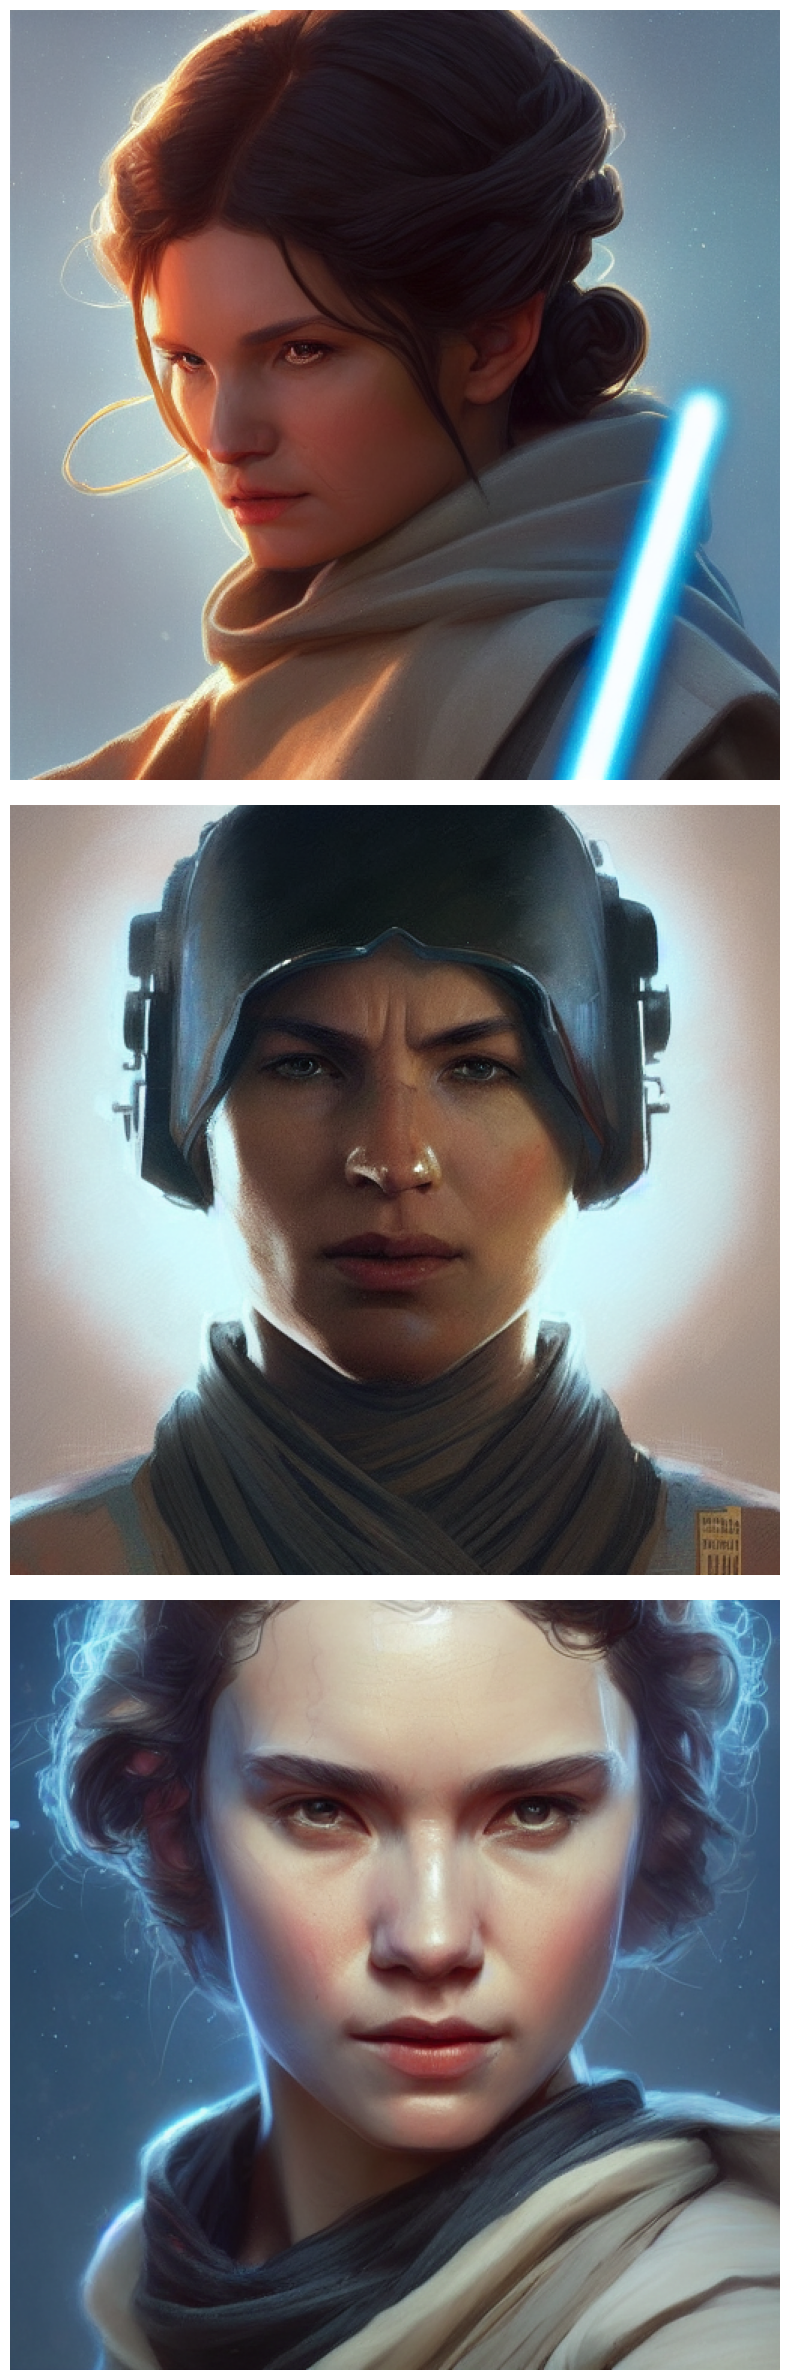

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(ax_size, ax_size * img_num))

for i, img in enumerate(images):
  ax = fig.add_subplot(img_num, 1, i + 1)
  ax.set_axis_off()
  plt.imsave(f'./img-{i+1:02d}.jpg', img)
  plt.imshow(img)

plt.tight_layout()
plt.show()